In [1]:
import pandas as pd
from fbprophet import Prophet

from src.loaders.data_loader import load_train_data, load_submission_data
from src.preprocessors.splitors import split_train_valid_test_for_cv, split_x_y_for_lightgbm_train

Importing plotly failed. Interactive plots will not work.


In [3]:
df = load_train_data()
df.head(5)

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
0,0,0,0,0,0,1.5,69.08,-12,0.0
1,0,0,30,0,0,1.5,69.06,-12,0.0
2,0,1,0,0,0,1.6,71.78,-12,0.0
3,0,1,30,0,0,1.6,71.75,-12,0.0
4,0,2,0,0,0,1.6,75.20,-12,0.0


In [23]:
from datetime import datetime
datetime(1970, 1, 1).timestamp

<function datetime.timestamp>

In [126]:
datetime(2000, 1, 1)
pd.Timedelta(30, 'minute')
df["ds"] = datetime(2000, 1, 1) + df.index * pd.Timedelta(30, 'minute')
df["y"] = df["TARGET"]

In [127]:
x = df[0:336]
y = df[336:336 + 96]

In [128]:

# for index, (train, valid, test) in enumerate(split_train_valid_test_for_cv(feature_engineered_df, ratio)):
#     m = Prophet()
    

In [129]:
m = Prophet()
m.fit(x)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [148]:
future = m.make_future_dataframe(periods=96, freq='30min')

In [149]:
future.tail()

,ds
427,2000-01-09 21:30:00
428,2000-01-09 22:00:00
429,2000-01-09 22:30:00
430,2000-01-09 23:00:00
431,2000-01-09 23:30:00


In [150]:
forecast = m.predict(future)

In [151]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2000-01-01 00:00:00,0.503945,-6.879247,8.386229
1,2000-01-01 00:30:00,0.512367,-7.095539,9.272899
2,2000-01-01 01:00:00,0.661702,-6.980630,8.050290
3,2000-01-01 01:30:00,0.903355,-5.463633,8.436626
4,2000-01-01 02:00:00,1.163769,-6.816646,9.149735
...,...,...,...,...
427,2000-01-09 21:30:00,0.254802,-7.354809,7.429722
428,2000-01-09 22:00:00,0.089652,-7.130164,7.693899
429,2000-01-09 22:30:00,-0.194570,-7.171238,7.726437
430,2000-01-09 23:00:00,-0.509482,-7.953500,7.912927


In [158]:
import numpy as np

a = 0
for i in range(1, 10):
    tau = i/10
    y_pred = forecast[['yhat']][336:336 + 96].values
    y_true = y[['TARGET']].values
    a = np.mean(np.maximum(tau * (y_true - y_pred), (tau - 1) * (y_true - y_pred)))

a/9

0.4105094969239859

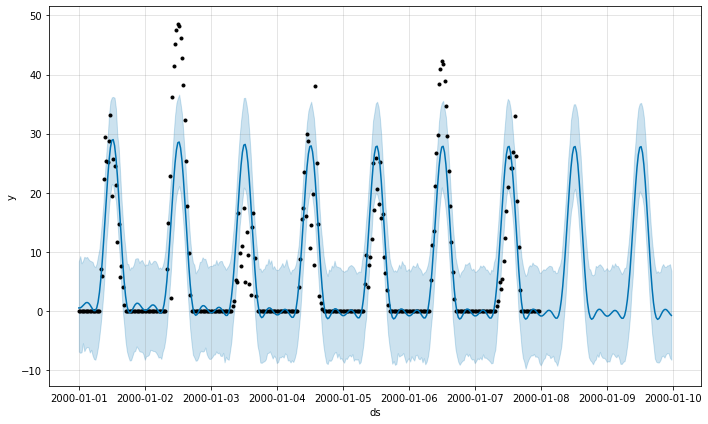

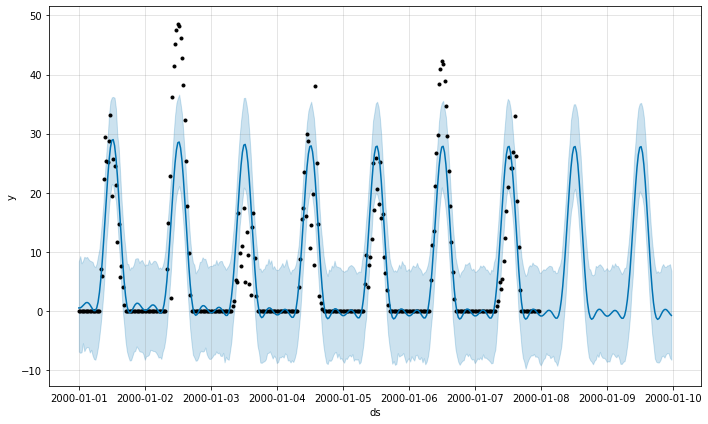

In [153]:
m.plot(forecast)